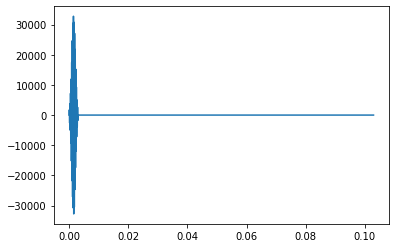

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from time import time
from scipy.io.wavfile import write, read
from scipy.fft import fft, ifft, fftshift, ifftshift


# we prepare the audio pulse as numpy array according to the user desires

pulse_duration= 0.003
echo_recording_duration=0.1
frequency = 5000 # above human speech
gaussian_envelope=True
broadcast_sample_rate=44100
sigma_duration_ratio = 5

recording_sample_rate=44100


envelope_std = pulse_duration/sigma_duration_ratio


t = np.linspace(0, pulse_duration,
        int(pulse_duration*broadcast_sample_rate), False)
note = np.sin( 2*np.pi*frequency*t )
# if a gaussian envelope is desired, it is applied
if gaussian_envelope==True:
    def gaussian(x, mu, stdv):
        return np.exp(-0.5*(x - mu)**2 / stdv**2)/(np.sqrt(2.0*np.pi)*stdv)
    gaussian_f = gaussian(t, mu=pulse_duration/2.0, stdv=envelope_std)
    note = note*gaussian_f

# Ensure that highest value is in 16-bit range
audio = np.zeros(int((echo_recording_duration+pulse_duration)*broadcast_sample_rate), dtype=np.float64)
audio[:len(t)] = (note / np.max(np.abs(note)))*(2**15-1)
# Convert to 16-bit data
audio = audio.astype(np.int16)

t = np.linspace(0, pulse_duration+echo_recording_duration,
        int((pulse_duration+echo_recording_duration)*broadcast_sample_rate), False)
# show the audio pulse
plt.plot(t, audio)
plt.show()

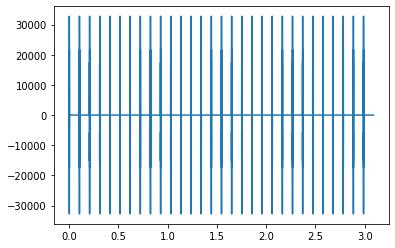

In [35]:
reps=30
audio = np.tile(audio, reps)
t = np.linspace(0, (pulse_duration+echo_recording_duration)*reps,
        len(audio), False)
# show the audio pulse
plt.plot(t, audio)
plt.show()

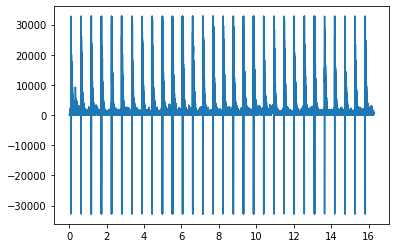

In [4]:
recording = sd.playrec(audio, recording_sample_rate, channels=1)

sd.wait()
middle_t=time()

# save recording
write(f"./Echo_.wav", 
          recording_sample_rate, recording)  # Save as WAV file

plt.plot(t, np.abs(recording))
plt.show()
#while((time()-begin_t)<self.pulse_duration): # grab all the possible images


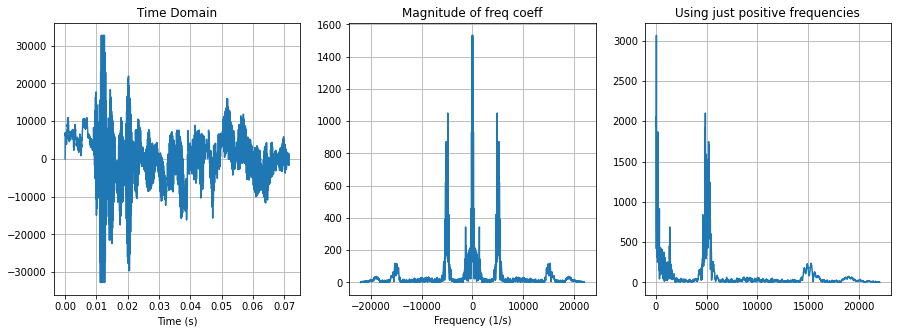

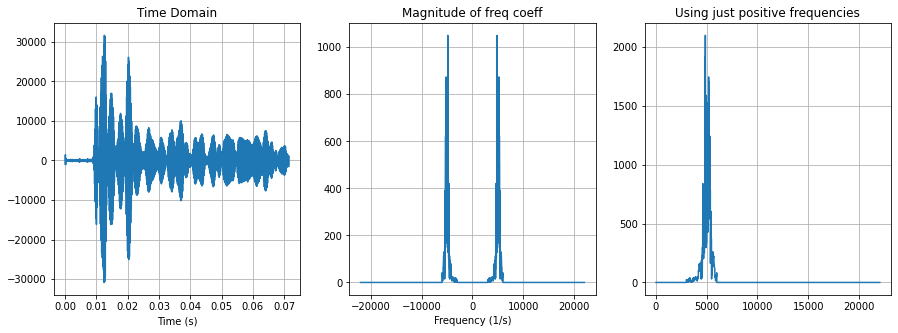

In [112]:
lower_freq_1 = 0
upper_freq_1 = 3000

lower_freq_2 = 6000
upper_freq_2 = 0.5*recording_sample_rate

# postprocess sound
# erase first zeros
difs = np.abs(recording[1:]-recording[:-1])
valid =  recording[np.argwhere(difs!=0)[0,0]:,0]
valid_times=t[:len(valid)]

# filtro pasa altos a 15 kHz
sample_rate=recording_sample_rate # discrete samples of the underlying function per second

# number of total signal points
N = len(valid)

# sample spacing is sample_rate smaples per second-> time between samples is:
T = 1.0 / sample_rate

#times = np.linspace(0.0, N*T, N)
#print(times, valid_times)

samplesFourierCoefs = fft(valid.astype(np.float64), N)
# frecs = np.concatenate((np.linspace(0, 1.0/(2.0*T), N//2), np.linspace(-1.0/(2.0*T), 0, N//2))) # before the shifting for plotting
frecs = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N) # this is after applying the shift for ploting
samplesFourierCoefs = fftshift(samplesFourierCoefs)

def plot_fourier1D(times, frecs, samples, fourier_coefs):
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    axes[0].plot(times, samples)
    axes[0].set_title("Time Domain")
    axes[0].set_xlabel("Time (s)")
    axes[0].grid()

    axes[1].plot(frecs, 1/N*np.abs(fourier_coefs))
    axes[1].set_title("Magnitude of freq coeff")
    axes[1].set_xlabel("Frequency (1/s)")
    axes[1].grid()

    axes[2].plot(frecs[N//2:], 2/N*np.abs(fourier_coefs)[N//2:])
    axes[2].set_title("Using just positive frequencies")
    axes[2].grid()

    plt.show()

plot_fourier1D(valid_times, frecs, valid, samplesFourierCoefs)

# apply filtering
samplesFourierCoefs[ (np.abs(frecs)<=upper_freq_1) & (np.abs(frecs)>=lower_freq_1) ]=0
samplesFourierCoefs[ (np.abs(frecs)<=upper_freq_2) & (np.abs(frecs)>=lower_freq_2) ]=0

filtered_sound = ifft(ifftshift(samplesFourierCoefs)).real

plot_fourier1D(valid_times, frecs, filtered_sound, samplesFourierCoefs)

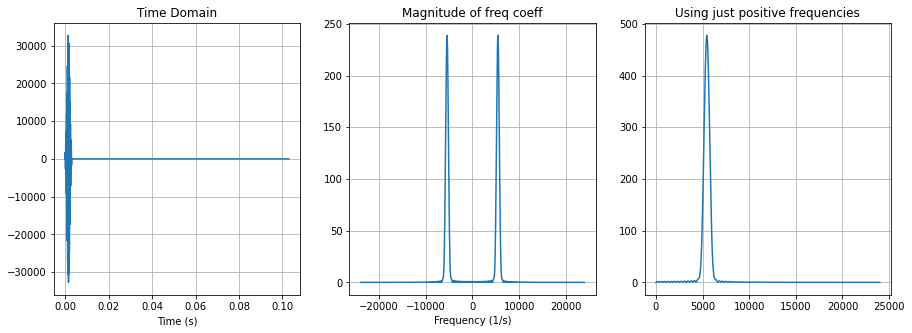

In [38]:
N = len(audio)

# sample spacing is sample_rate smaples per second-> time between samples is:
T = 1.0 / sample_rate

#times = np.linspace(0.0, N*T, N)
#print(times, valid_times)

samplesFourierCoefs = fft(audio.astype(np.float64), N)
# frecs = np.concatenate((np.linspace(0, 1.0/(2.0*T), N//2), np.linspace(-1.0/(2.0*T), 0, N//2))) # before the shifting for plotting
frecs = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N) # this is after applying the shift for ploting
samplesFourierCoefs = fftshift(samplesFourierCoefs)

plot_fourier1D(t, frecs, audio, samplesFourierCoefs)


In [107]:
2000/48000

0.041666666666666664

48000


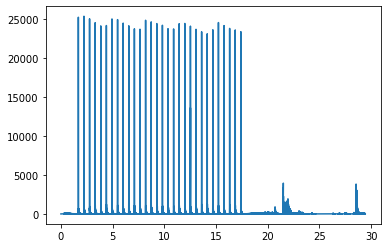

In [6]:
recording_sample_rate, recording = read("audio.wav")
recording = np.mean(recording, axis=1)
print(recording_sample_rate)
t=np.linspace(0, len(recording)/recording_sample_rate, len(recording), False)
plt.plot(t, np.abs(recording))
plt.show()

0.0019000000000000002


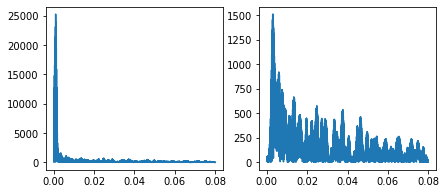

1
0.0033


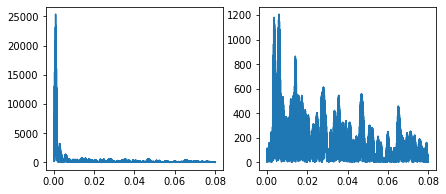

2
0.0019000000000000002


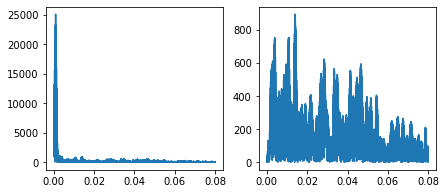

3
0.0019000000000000002


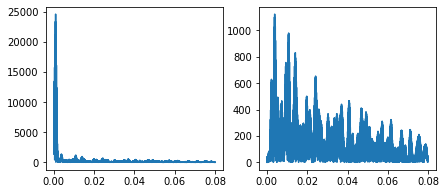

4
0.0019000000000000002


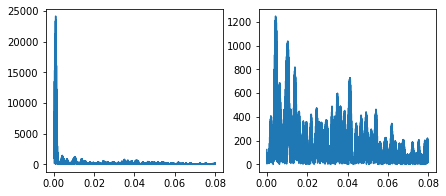

5
0.005299999999999998


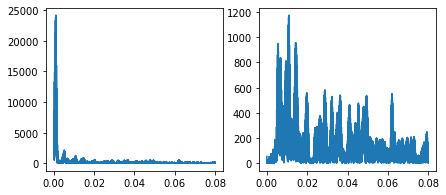

6
0.0019000000000000002


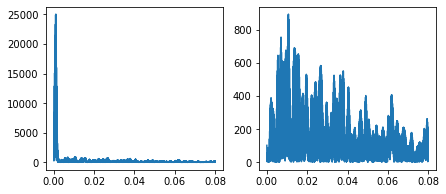

7
0.0019000000000000002


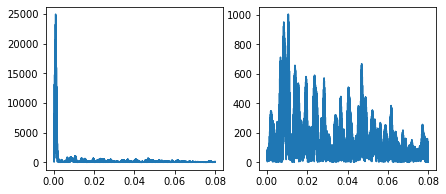

8
0.0019000000000000002


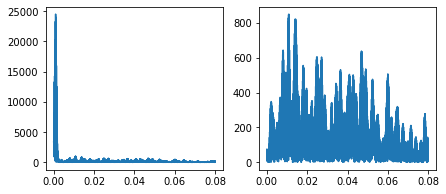

9
0.0019000000000000002


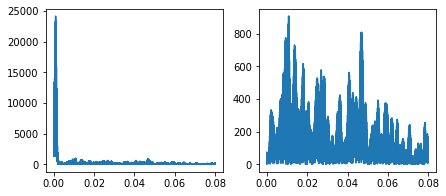

10
0.0019000000000000002


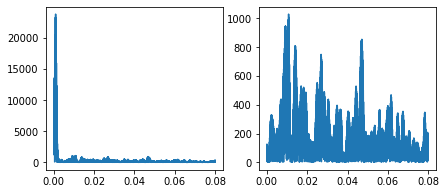

11
0.0019000000000000002


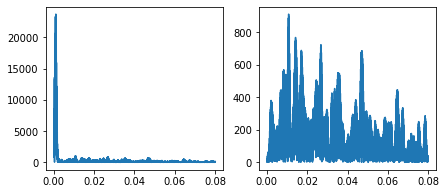

12
0.0019000000000000002


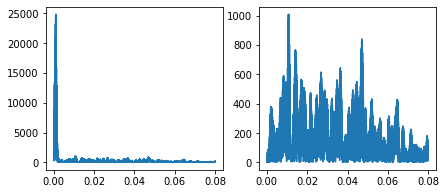

13
0.0019000000000000002


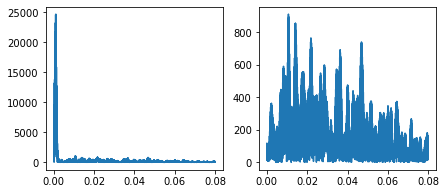

14
0.0019000000000000002


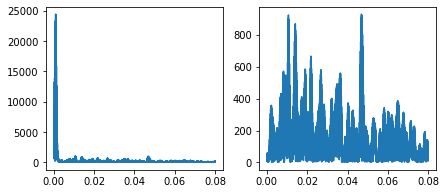

15
0.0019000000000000002


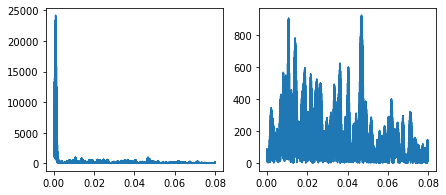

16
0.0019000000000000002


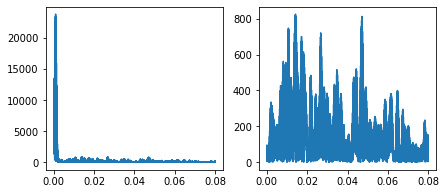

17
0.0019000000000000002


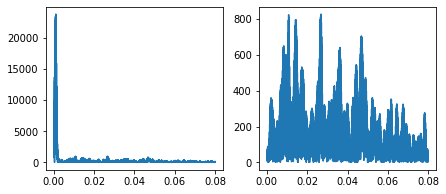

18
0.0019000000000000002


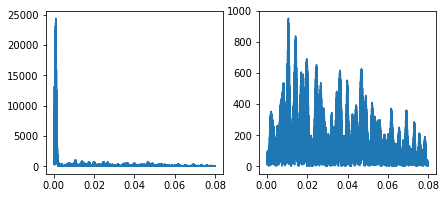

19
0.0019000000000000002


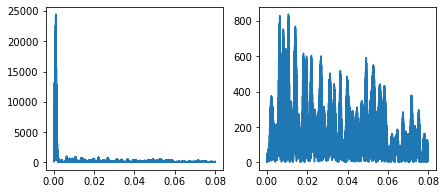

20
0.0019000000000000002


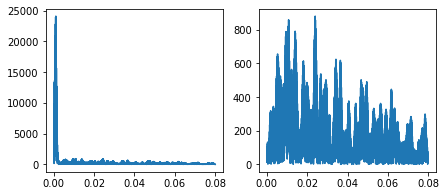

21
0.0019000000000000002


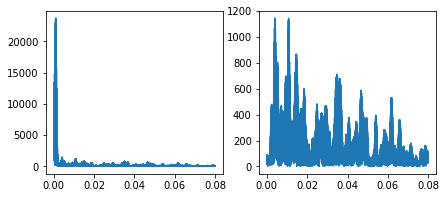

22
0.0019000000000000002


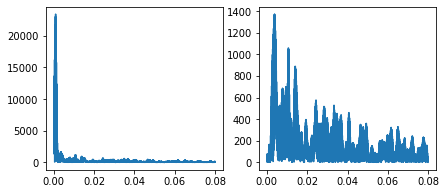

23
0.0019000000000000002


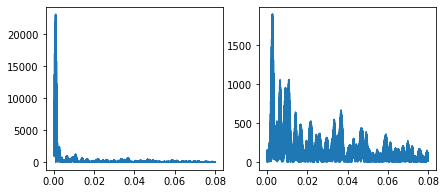

24
0.0031000000000000003


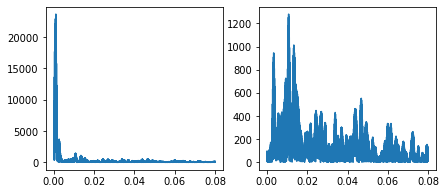

25
0.0031000000000000003


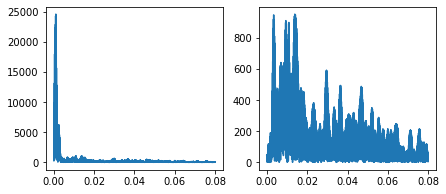

26
0.0028000000000000004


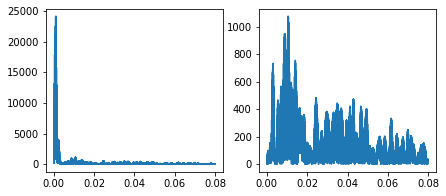

27
0.0029000000000000007


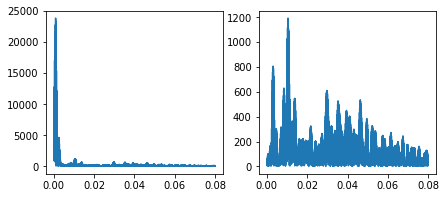

28
0.0033


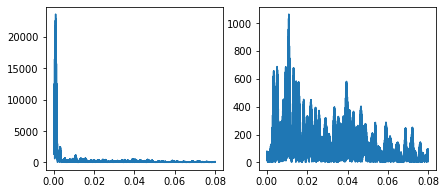

29
0.0019000000000000002


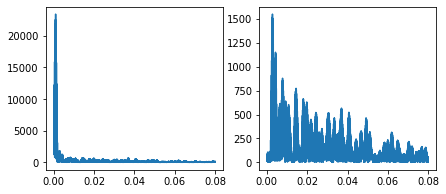

30
0.016099999999999965


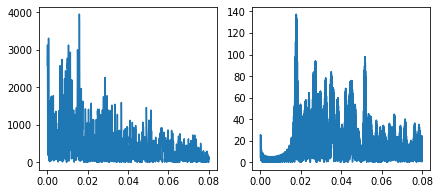

31
0.07270000000000103


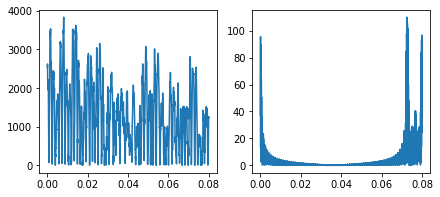

32
0.0034


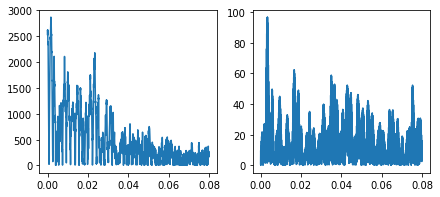

33


In [31]:
audio=recording.copy()
round_duration = 0.08
bound = 10
lower_freq_1 = 0
upper_freq_1 = 4500

lower_freq_2 = 5500
upper_freq_2 = 0.5*recording_sample_rate
# filtro pasa altos a 15 kHz
sample_rate=recording_sample_rate # discrete samples of the underlying function per second

# number of total signal points
N = int(round_duration*recording_sample_rate)

# sample spacing is sample_rate smaples per second-> time between samples is:
T = 1.0 / sample_rate
frecs = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N) # this is after applying the shift for ploting

recordings = []

where = np.argwhere(audio>audio.max()/bound)
t=np.linspace(0, round_duration, int(round_duration*recording_sample_rate), False)

last_added_j = 0

for j, where_idx in enumerate(where):
    if where_idx >= ( where[last_added_j]+int(round_duration*recording_sample_rate) ) or j==0:
        a1 = audio[ int(where_idx): int(where_idx)+int(round_duration*recording_sample_rate)]
        fig, axs = plt.subplots(1,2, figsize=(7,3))
        axs[0].plot(t,np.abs(a1))
        
        extra=0
        while np.max(a1)>2000:
            extra+=0.0001
            a1[:int((pulse_duration/2+extra)*recording_sample_rate)]=0
        print((pulse_duration/2+extra))
        samplesFourierCoefs = fft(a1.astype(np.float64), N)
        samplesFourierCoefs = fftshift(samplesFourierCoefs)
        # apply filtering
        samplesFourierCoefs[ (np.abs(frecs)<=upper_freq_1) & (np.abs(frecs)>=lower_freq_1) ]=0
        samplesFourierCoefs[ (np.abs(frecs)<=upper_freq_2) & (np.abs(frecs)>=lower_freq_2) ]=0

        a1 = ifft(ifftshift(samplesFourierCoefs)).real
        axs[1].plot(t, np.abs(a1))
        plt.show()
        recordings.append(a1)
        print(len(recordings))
        last_added_j=j

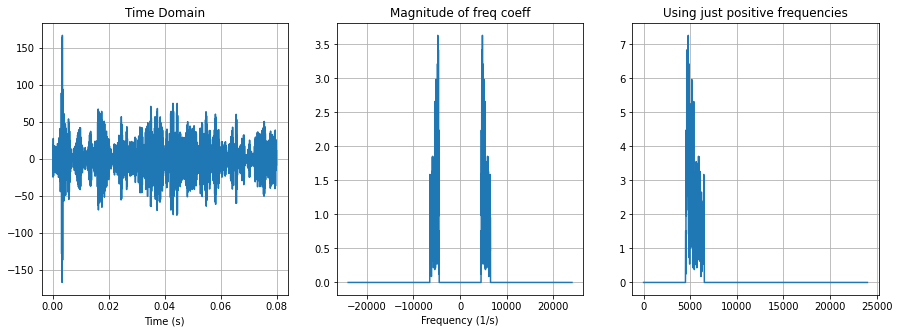

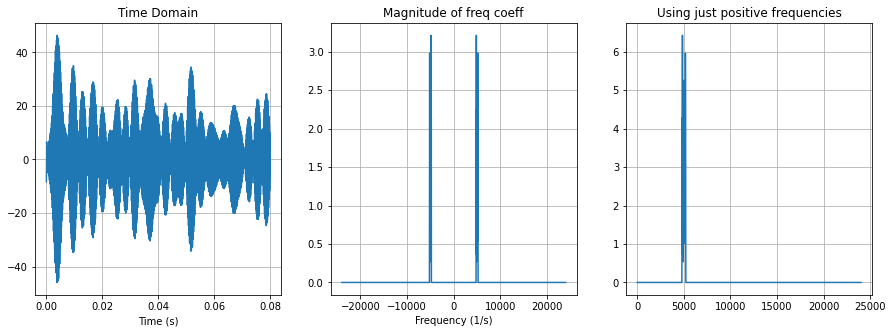

In [29]:
lower_freq_1 = 0
upper_freq_1 = 4800

lower_freq_2 = 5200
upper_freq_2 = 0.5*recording_sample_rate

# postprocess sound
# erase first zeros
difs = np.abs(a1[1:]-a1[:-1])
valid =  a1[np.argwhere(difs!=0)[0,0]:]
valid_times=t[:len(valid)]

# filtro pasa altos a 15 kHz
sample_rate=recording_sample_rate # discrete samples of the underlying function per second

# number of total signal points
N = len(valid)

# sample spacing is sample_rate smaples per second-> time between samples is:
T = 1.0 / sample_rate

#times = np.linspace(0.0, N*T, N)
#print(times, valid_times)

samplesFourierCoefs = fft(valid.astype(np.float64), N)
# frecs = np.concatenate((np.linspace(0, 1.0/(2.0*T), N//2), np.linspace(-1.0/(2.0*T), 0, N//2))) # before the shifting for plotting
frecs = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N) # this is after applying the shift for ploting
samplesFourierCoefs = fftshift(samplesFourierCoefs)

def plot_fourier1D(times, frecs, samples, fourier_coefs):
    fig, axes = plt.subplots(1, 3, figsize=(15,5))
    axes[0].plot(times, samples)
    axes[0].set_title("Time Domain")
    axes[0].set_xlabel("Time (s)")
    axes[0].grid()

    axes[1].plot(frecs, 1/N*np.abs(fourier_coefs))
    axes[1].set_title("Magnitude of freq coeff")
    axes[1].set_xlabel("Frequency (1/s)")
    axes[1].grid()

    axes[2].plot(frecs[N//2:], 2/N*np.abs(fourier_coefs)[N//2:])
    axes[2].set_title("Using just positive frequencies")
    axes[2].grid()

    plt.show()

plot_fourier1D(valid_times, frecs, valid, samplesFourierCoefs)

# apply filtering
samplesFourierCoefs[ (np.abs(frecs)<=upper_freq_1) & (np.abs(frecs)>=lower_freq_1) ]=0
samplesFourierCoefs[ (np.abs(frecs)<=upper_freq_2) & (np.abs(frecs)>=lower_freq_2) ]=0

filtered_sound = ifft(ifftshift(samplesFourierCoefs)).real

plot_fourier1D(valid_times, frecs, filtered_sound, samplesFourierCoefs)